In [2]:
heap.building = function(vec)
{
  len=length(vec)
  heap=vec
  for (j in len:1)
  {
    heap=modify.heap(heap,j)
  }
  return(heap)
}
is.heap = function(heap,root_i)
{
  i=root_i
  res=T
  while(2*i<=length(heap)&res)
  {
    son=c(heap[2*i],heap[2*i+1])
    son=son[!is.na(son)]
    res=all(heap[i]<=son)
    i=i+1
  }
  return(res)
}
modify.heap = function(heap,root_i)
{
  len=length(heap)
  flag=1
  
  while (root_i*2<=len&&flag==1)
  {
    left_i=root_i*2
    right_i=root_i*2+1
    flag=0
    son=c(heap[left_i],heap[right_i])
    son=son[!is.na(son)]
    min_ind=which.min(son)
    if (heap[root_i]>son[min_ind])
    {
      flag=1
      heap_ind=c(left_i,right_i)[min_ind]
      
      tmp=heap[heap_ind]
      heap[heap_ind]=heap[root_i]
      heap[root_i]=tmp
      
      root_i=heap_ind
    }
  }
  return(heap)
}

heap.sort = function(heap)
{
  sorted=NULL
  len=length(heap)
  while(len>0)
  {
    sorted=c(sorted,heap[1])
    len=length(heap)
    heap[1]=heap[len]
    heap=heap[1:(len-1)]
    heap=modify.heap(heap,root_i=1)
    len=len-1
  }
  return(sorted)
}


In [3]:
# time  for heapsort
time = function(x){
  destination = c()
  for(i in c(1:50)){
    n = as.numeric(system.time(heap.sort(heap.building(x)))[1])
    destination = c(destination, n)
  }
  mean_value = mean(destination)
  times = destination
  
  # print(times)
  
  destination
}

In [4]:
#percent function
percent = function(sampl){
  length.sampl = length(sampl)
  unique.sampl = length(unique(sampl))
  percent = 100-floor(100*unique.sampl/length.sampl)
  percent
}

In [5]:
#percents with "%"
percent_strings = function(per.s)
{
  percent.array = sprintf("%i%s",per.s, "%" )
  repeats = c()
  
  for (i in 1:6)
  {
    repeats = c(repeats,rep(percent.array[i],50))
  }
  repeats
}

In [6]:
#percents num
percent_num = function(per.s)
{
 
  repeats = c()
  
  for (i in 1:6)
  {
    repeats = c(repeats,rep(per.s[i],50))
  }
  repeats
}

In [7]:
# create samples
repeat_level1 = sample(1:1000000, 2000, replace=TRUE )

repeat_level2 = sample(1:10000, 2000, replace = TRUE)

repeat_level3 = sample(1000:4500, 2000, replace = TRUE)

repeat_level4 = sample(1000:2000, 2000, replace = TRUE)

repeat_level5 = sample(1000:1500, 2000, replace = TRUE)

repeat_level6 = sample(1000:1100, 2000, replace = TRUE)

In [8]:
percents = c(percent(repeat_level1),
             percent(repeat_level2),
             percent(repeat_level3),
             percent(repeat_level4),
             percent(repeat_level5),
             percent(repeat_level6))
percents

[1]  0 10 25 57 76 95

In [9]:
times = vector(mode = "list", length = 6)
times[[1]] = time(repeat_level1)
times[[2]] = time(repeat_level2)
times[[3]] = time(repeat_level3)
times[[4]] = time(repeat_level4)
times[[5]] = time(repeat_level5)
times[[6]] = time(repeat_level6)

In [10]:
times.array = c()
for (i in 1:6)
    {
    times.array = c(times.array,times[[i]])
    }

In [12]:
#create data
percent.string = percent_strings(percents)
datas = data.frame(times.array, percent.string)

In [13]:
str(datas)

'data.frame':	300 obs. of  2 variables:
 $ times.array   : num  0.12 0.11 0.08 0.07 0.08 ...
 $ percent.string: Factor w/ 6 levels "0%","10%","25%",..: 1 1 1 1 1 1 1 1 1 1 ...


In [14]:
percent.num = percent_num(percents)
## 
datass = data.frame(times.array,percent.num)
str(datass)

'data.frame':	300 obs. of  2 variables:
 $ times.array: num  0.12 0.11 0.08 0.07 0.08 ...
 $ percent.num: num  0 0 0 0 0 0 0 0 0 0 ...


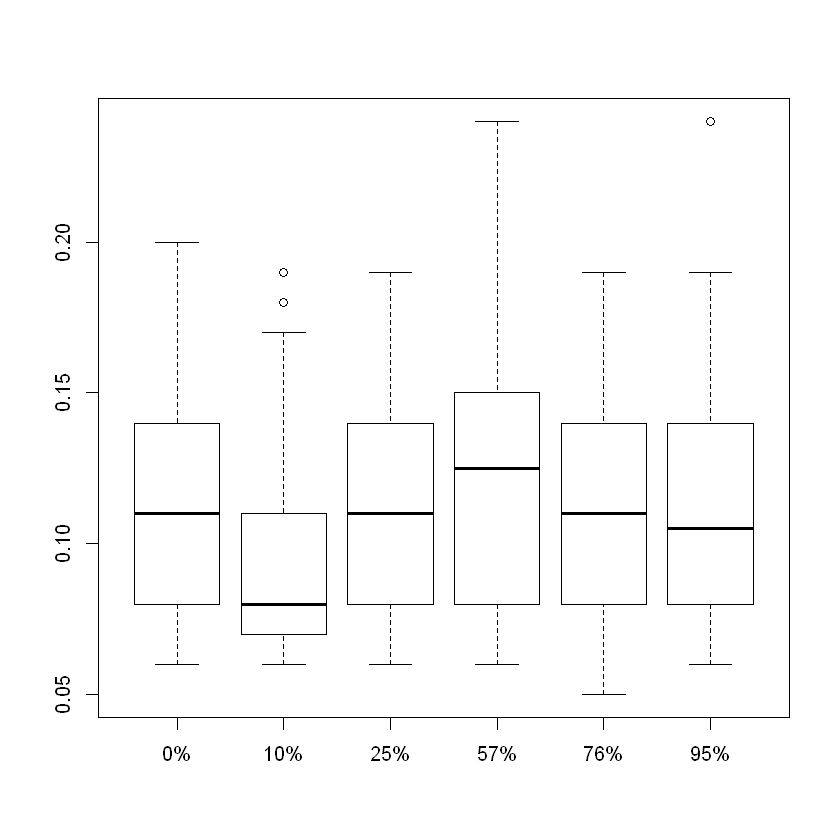

In [15]:
boxplot(times.array ~ percent.string, data = datas)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

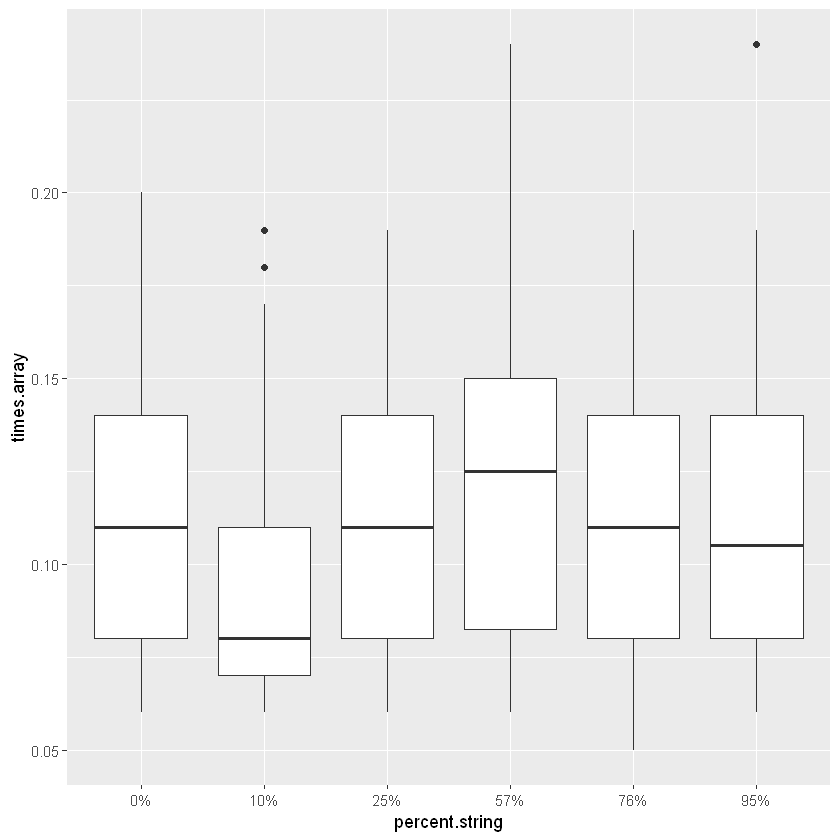

In [16]:
#the same plot but through ggplot
library(ggplot2)

ggplot(datas, aes(x = percent.string, y = times.array)) + geom_boxplot()

In [17]:
result = aov(times.array ~ percent.string, data = datas)
summary(result) ## p-value > 0.05 cant break that times are the same
## repeats dont inluence on times

                Df Sum Sq  Mean Sq F value Pr(>F)  
percent.string   5 0.0176 0.003524   2.529 0.0292 *
Residuals      294 0.4097 0.001394                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

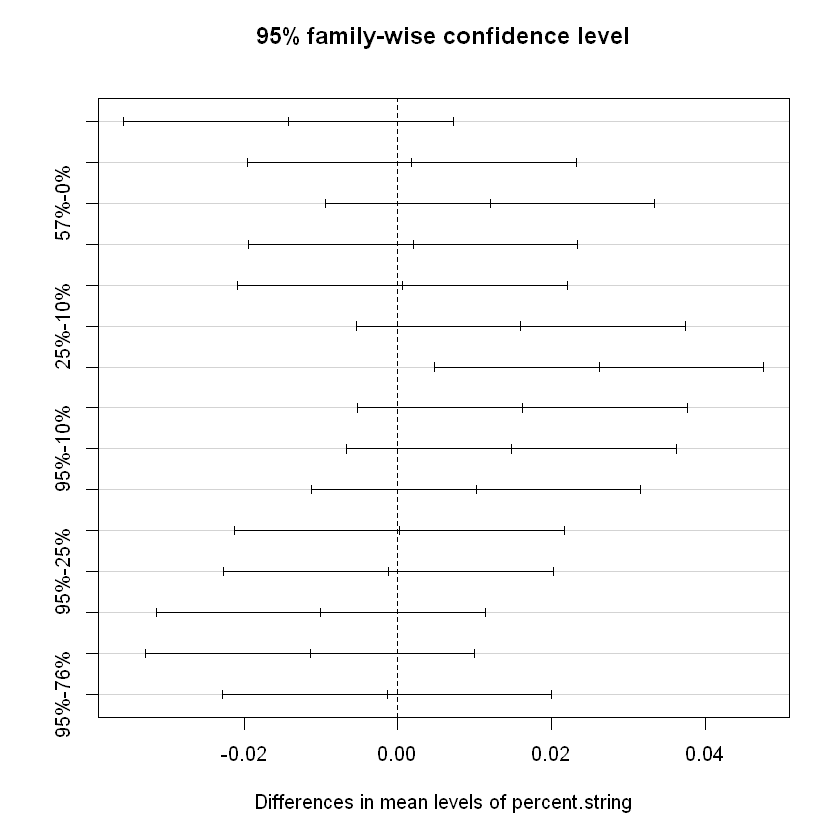

In [18]:
# how diference between every 2 factors
tuk = TukeyHSD(result)
plot(TukeyHSD(result))

In [19]:
# means model
model.tables(result, "means")

Tables of means
Grand mean
          
0.1115667 

 percent.string 
percent.string
    0%    10%    25%    57%    76%    95% 
0.1112 0.0970 0.1130 0.1232 0.1132 0.1118 